Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None

Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080  

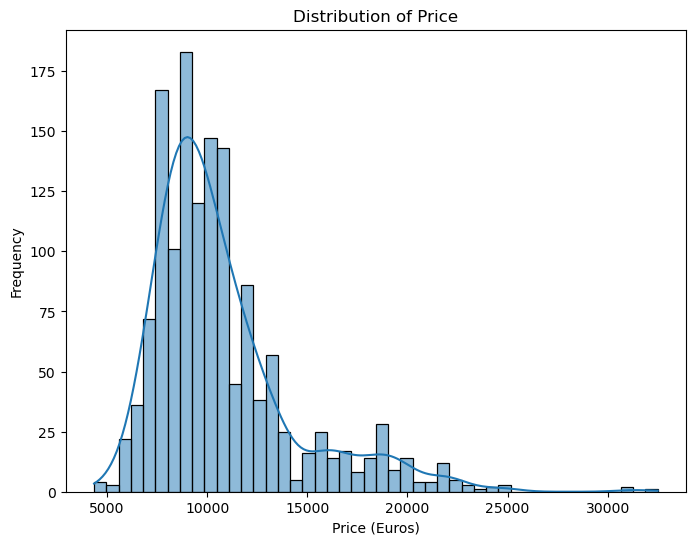

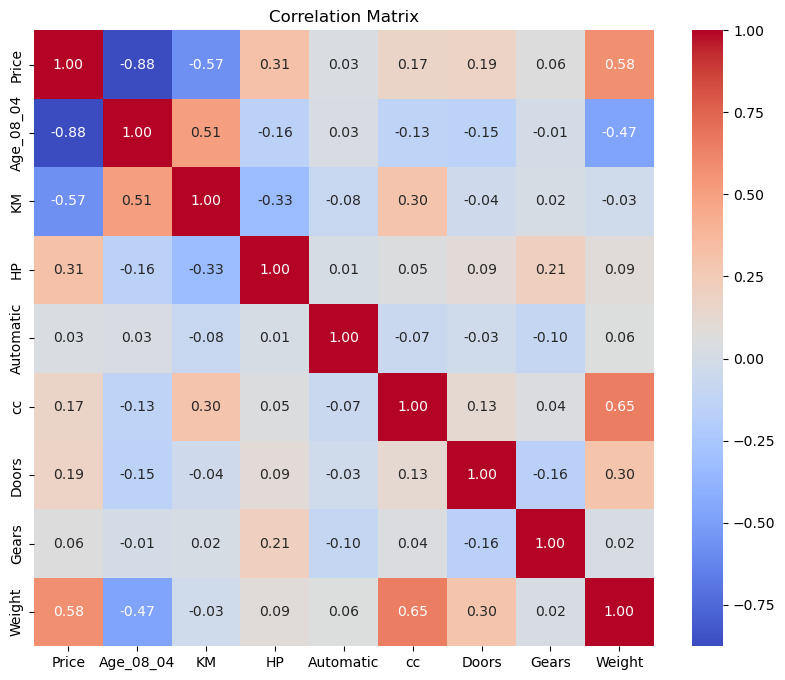

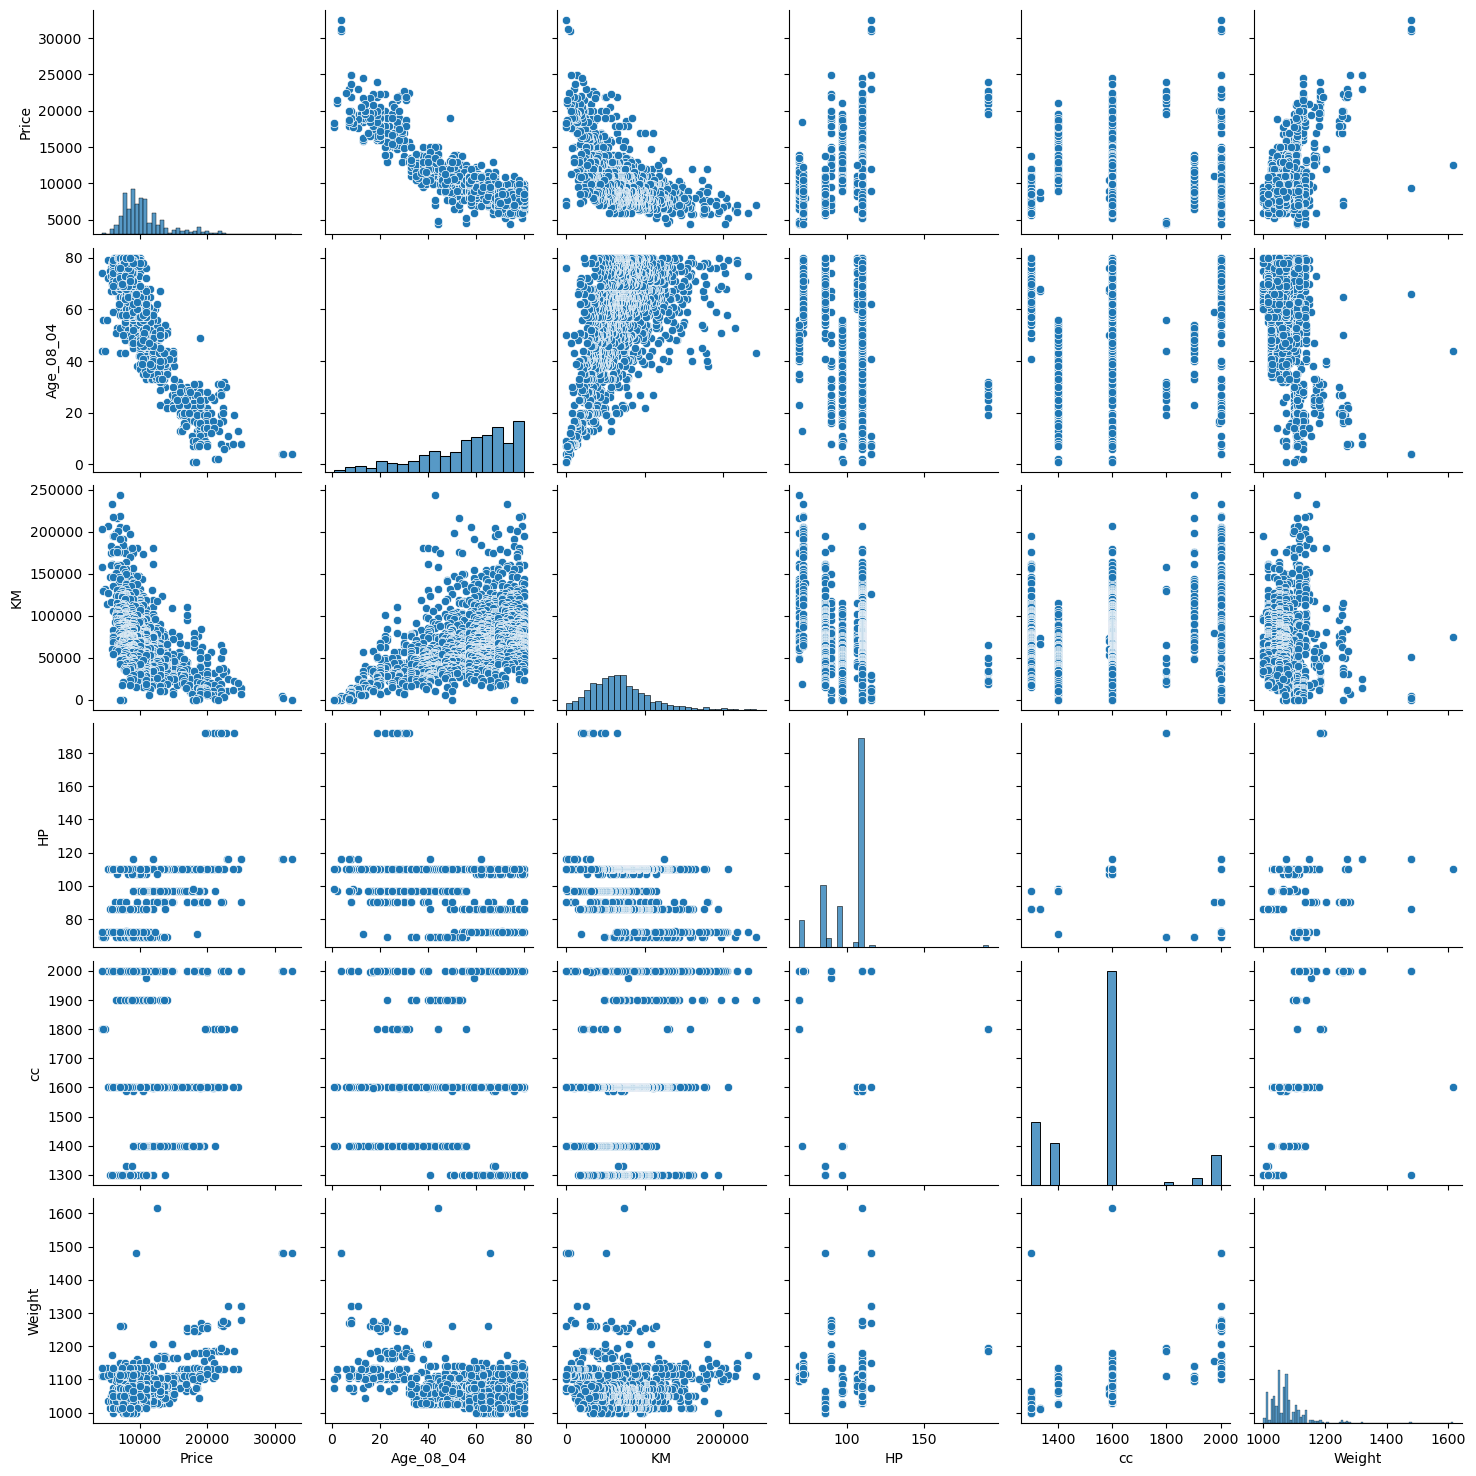

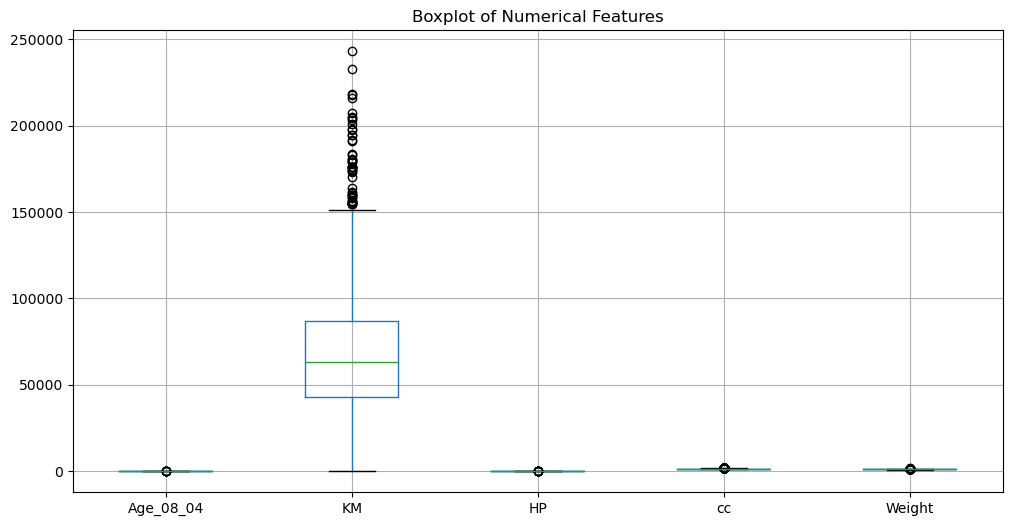


Model 1 Coefficients:
            Feature  Coefficient
0         Age_08_04 -2247.727898
1                KM  -582.244177
2                HP   616.789362
3         Automatic    48.019076
4                cc  -596.234691
5             Doors   -24.417989
6             Gears    94.777566
7            Weight  1272.082700
8  Fuel_Type_Diesel   645.157711
9  Fuel_Type_Petrol   431.037203

Model 1 (Basic LR) Performance:
Train RMSE: 1288.48, Test RMSE: 1428.44
Train R2: 0.87, Test R2: 0.85

Model 2 (Selected Features) Performance:
Train RMSE: 1392.84, Test RMSE: 1494.98
Train R2: 0.85, Test R2: 0.83

Model 3 (Polynomial Features) Performance:
Train RMSE: 1051.68, Test RMSE: 1821.87
Train R2: 0.92, Test R2: 0.75

Lasso Regression Performance:
Train RMSE: 1288.48, Test RMSE: 1428.65
Train R2: 0.87, Test R2: 0.85

Ridge Regression Performance:
Train RMSE: 1288.49, Test RMSE: 1429.23
Train R2: 0.87, Test R2: 0.85

Interview Question 1: Normalization & Standardization
Normalization: Scales featur

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

# --- Task 1: Exploratory Data Analysis (EDA) ---
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop 'Cylinders' column as it is constant (all values are 4)
data = data.drop('Cylinders', axis=1)

# Inspect potential outliers in 'cc' (e.g., 16000)
print("\nUnique cc values:")
print(data['cc'].value_counts().sort_index())

# Replace outlier 'cc' value (16000) with a reasonable value (e.g., 1600)
# Assumption: 16000 is likely a typo for 1600
data['cc'] = data['cc'].replace(16000, 1600)

# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()

# Select numerical columns for correlation matrix
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Visualize correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Pairplot for key numerical features
sns.pairplot(data[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.savefig('pairplot.png')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
data[['Age_08_04', 'KM', 'HP', 'cc', 'Weight']].boxplot()
plt.title('Boxplot of Numerical Features')
plt.savefig('boxplot.png')
plt.show()

# Preprocess categorical variable: Fuel_Type (convert to dummy variables)
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)

# --- Task 2: Split the Dataset ---
# Define features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Task 3: Build Multiple Linear Regression Models ---
# Model 1: Basic Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Model 2: Linear Regression with selected features (based on correlation)
# From correlation matrix, select features with high correlation to Price: Age_08_04, KM, Weight
selected_features = ['Age_08_04', 'KM', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected_scaled, y_train)

# Model 3: Linear Regression with polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train)

# Interpret coefficients for Model 1
print("\nModel 1 Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print(coef_df)

# --- Task 4: Evaluate Model Performance ---
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"\n{model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train R2: {train_r2:.2f}, Test R2: {test_r2:.2f}")

# Evaluate all models
evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Model 1 (Basic LR)")
evaluate_model(lr_model_selected, X_train_selected_scaled, X_test_selected_scaled, y_train, y_test, "Model 2 (Selected Features)")
evaluate_model(lr_model_poly, X_train_poly, X_test_poly, y_train, y_test, "Model 3 (Polynomial Features)")

# --- Task 5: Apply Lasso and Ridge Regression ---
# Lasso Regression
lasso = Lasso(alpha=0.1)  # Alpha chosen for moderate regularization
lasso.fit(X_train_scaled, y_train)
evaluate_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression")

# Ridge Regression
ridge = Ridge(alpha=1.0)  # Alpha chosen for moderate regularization
ridge.fit(X_train_scaled, y_train)
evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression")

# --- Interview Questions ---
# Q1: What is Normalization & Standardization and how is it helpful?
print("\nInterview Question 1: Normalization & Standardization")
print("Normalization: Scales features to a fixed range, typically [0, 1]. Useful for algorithms sensitive to feature scales (e.g., KNN, Neural Networks).")
print("Standardization: Scales features to have mean=0 and variance=1. Preferred for linear regression, Lasso, and Ridge as it ensures features contribute equally.")
print("Helpfulness: Improves model convergence, reduces bias from feature scales, and enhances performance of gradient-based algorithms.")

# Q2: What techniques can be used to address multicollinearity in multiple linear regression?
print("\nInterview Question 2: Addressing Multicollinearity")
print("1. Remove highly correlated features: Drop one of the correlated variables based on correlation matrix or VIF (Variance Inflation Factor).")
print("2. Principal Component Analysis (PCA): Transform correlated features into uncorrelated principal components.")
print("3. Regularization (Lasso/Ridge): Penalize large coefficients to reduce the impact of multicollinearity.")
print("4. Combine correlated features: Create a single feature (e.g., average or sum) from correlated variables.")

# --- Assumptions and Implications ---
print("\nAssumptions Made:")
print("1. No missing values in the dataset. Implication: If missing values were present, imputation or removal would be needed, potentially affecting results.")
print("2. Fuel_Type has categories Petrol, Diesel, CNG. Implication: Correct encoding ensures proper model interpretation.")
print("3. Linear relationships exist between features and Price. Implication: Non-linear patterns are addressed in Model 3 (Polynomial Features).")
print("4. Outlier in 'cc' (16000) is a typo corrected to 1600. Implication: Incorrect handling could skew model performance.")
print("5. Dropped 'Cylinders' due to constant value. Implication: No impact on model as it provides no variance.")
print("6. Selected features for Model 2 based on correlation. Implication: Other features may also be relevant, potentially limiting Model 2's performance.")
